In [1]:
import sys
import os
import shutil

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# This line of code changes the parent directory, do not run it more than once or it will cause issues as it will change the working directory.
%cd .. 

# Remove the folders 'reports/plots', 'reports/models_saved', and 'reports/models' if they exist.
# This ensures that any previous model results, plots, or saved models are deleted before running the main function,
# so that all outputs are freshly generated in the notebook workflow.
for folder in ['reports/plots', 'reports/models_saved', 'reports/models']:
    if os.path.exists(folder):
        shutil.rmtree(folder)

# Import the main function from the main module and execute it to generate all necessary files and models for the notebook workflow.
from main import run_program
run_program()


print(os.getcwd())


/Users/stefan/VSCode/Freight-Prediction/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/stefan/VSCode/Freight-Prediction

🚀 Starting full freight pipeline...

📦 Fetching all raw data sources...

🔹 Fetching BPI...
🔹 Fetching Brent...
🔹 Fetching Commodities...
🔹 Fetching Port Congestion Metrics...
🔹 Fetching GSCPI...
🔹 Fetching Targets (Gulf & PNW)...
🔹 Fetching Trade Volume...

✅ All datasets fetched and saved to data/processed/
✅ All datasets merged and saved to data/processed/all_data.csv

🚀 Running all models for target: Gulf

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=568.113, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=577.172, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=571.522, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=572.791, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=575.964, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=573.201, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=574.346, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=568.97

19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:30 - cmdstanpy - INFO - Chain [1] done processing
19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:31 - cmdstanpy - INFO - Chain [1] done processing
19:01:31 - cmdstanpy - INFO - Chain [1] start processing
19:01:31 - cmdstanpy - INFO - Chain [1] done processing
19:01:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:01:31 - cmdstanpy - INFO - Chain [1] start processing
19:01:31 - cmdstanpy - INFO - Chain [1] done processing
19:01:31 - cmdstanpy - INFO - Chain [1] start processing
19:01:31 - cmdstanpy - INFO - Chain [1] done processing
19:01:31 - cmdstanpy - INFO - Chain [1] start processing
19:01:31 - cmdstanpy - INFO - Chain [1] done processing
19:01:31 - cmdstanpy - INFO - Chain [1] start processing
19:01:31 - cmdstanpy - INFO - Chain [1] done processing
19:01:31 - cmdstanpy - INFO - Chain [1] start process

Model saved to reports/models_saved/Gulf_uni_prophet_tuned_model.joblib


19:01:32 - cmdstanpy - INFO - Chain [1] done processing
19:01:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:01:32 - cmdstanpy - INFO - Chain [1] start processing
19:01:32 - cmdstanpy - INFO - Chain [1] done processing
19:01:32 - cmdstanpy - INFO - Chain [1] start processing
19:01:32 - cmdstanpy - INFO - Chain [1] done processing
19:01:32 - cmdstanpy - INFO - Chain [1] start processing
19:01:32 - cmdstanpy - INFO - Chain [1] done processing
19:01:32 - cmdstanpy - INFO - Chain [1] start processing
19:01:32 - cmdstanpy - INFO - Chain [1] done processing
19:01:32 - cmdstanpy - INFO - Chain [1] start processing
19:01:33 - cmdstanpy - INFO - Chain [1] done processing
19:01:33 - cmdstanpy - INFO - Chain [1] start processing
19:01:33 - cmdstanpy - INFO - Chain [1] done processing
19:01:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization t

Best Parameters: {'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.01}
Model saved to reports/models_saved/Gulf_multi_prophet_lagged_Tuned_model.joblib
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Model saved to reports/models_saved/Gulf_svm_model.joblib
Fitting 5 folds for each of 30 candidates, totalling 150 fits
XGBoost Test MAE: 0.82
XGBoost R² Score: 0.753
Best Parameters: {'subsample': 0.7, 'reg_lambda': 1.0, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Model saved to reports/models_saved/Gulf_xgboost_model.joblib

✅ All models executed and results saved to reports/models/


✅ All stages complete!
📦 Final dataset:      data/processed/processed.csv
📊 Model results:      reports/models/
📈 Ready for review.

/Users/stefan/VSCode/Freight-Prediction


In [2]:
# This is the code to import the necessary libraries and modules for data analysis and visualization.

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import importlib
import ipywidgets as widgets
from IPython.display import display
from utils.diagnostics import visualize_missing_data, compute_mutual_information
from utils.preprocessing import before_interpolate, interpolate, compute_seasonal_features, compute_bpi_volatility
from utils.compare_models import parse_model_results, plot_comparison
from models.run_all_models import run_all_models 


# Freight Forecasting Project Overview
## Problem Statement

Freight markets are notoriously volatile and influenced by a mix of macroeconomic, operational, and seasonal factors. This project builds a full freight forecasting pipeline based on open-source economic and maritime datasets. Predicting weekly freight prices can aid in:

- Chartering and logistics planning
- Risk analysis for shipping portfolios
- Strategic commodity trading

We incorporate relevant features such as:
- Global commodity and shipping prices (e.g., Brent crude, BPI)
- Port-level congestion indicators
- Agricultural trade flows (e.g., PNW, Corn price)
- Derived indicators like seasonal components and volatility

This notebook demonstrates a comprehensive freight forecasting pipeline that collects multiple datasets in to a single shared dataset, which upon which I train a selection of models. The models evaluated include traditional statistical approaches (e.g., ARIMA/ARIMAX), regression models (Ridge, Lasso), Machine Learning (SVR, XGBoost), and time-series forecasters (Prophet). 

Each model is evaluated on:
- 1-week-ahead prediction accuracy
- MAE (Mean Absolute Error)
- R² Score
- Visual comparison to actual values

We will therefore proceed as follows: Explore the data, engineer features, train and evaluate models, compare their performance, and interpret the best models using SHAP.

Models selection mathematical definitions

## Table of Contents
1. [Problem Statement](#1-problem-statement)  
2. [Data Overview](#2-data-overview)  
   1. [How data is merged, interpolated, resampled](#21-how-data-is-merged-interpolated-resampled)  
   2. [Feature engineering](#22-Feature-engineering)
   3. [Feature selection](#23-feature-selection)
   4. [Model selection](#24-model-selection)
   5. [Models selection mathematical definitions](#25-Models-selection-mathematical-definitions)
3. [Model evaluation and comparison](#3-model-evaluation-and-comparison)  
   1. [Model evaluation and comparison](#31-evaluation-summary) 
   2. [Evaluation conclusion](#32-evaluation-conclusion) 
4. [Model Interpretability](#4-model-interpretability)  
5. [Conclusion and Next Steps](#5-conclusion-and-next-steps)  

## 2. Data Overview

After having reviewed several papers (some of which live in the `theory/` folder), it appeared reasonable to assume that the key inputs driving freight rates include fuel prices, the value of the cargo, supply and demand dynamics, and market frictions such as port congestion. However, since I do not have access to high-quality proprietary data (e.g. Clarkson, Thomson Reuters, or AIS), I needed to explore alternative open-source datasets that could serve a similar purpose. Below is an overview of the public data sources I identified and ingested for this project:


| Variable              | Description                                   | Frequency  | Source 
|-----------------------|-----------------------------------------------|------------|-------------
| `Gulf`                | Gulf freight price (target variable)          | Weekly     | [US Dpm of Agricultural](https://www.ams.usda.gov/services/transportation-analysis/gtr-datasets)
| `PNW`                 | Pacific Northwest freight price               | Weekly     | [US Dpm of Agricultural](https://www.ams.usda.gov/services/transportation-analysis/gtr-datasets)
| `bpi`                 | Baltic Panamax Index                          | Daily      | [See Capital Markets](https://seecapitalmarkets.com/IndexDetailed?Id=430572) 
| `brent_price`         | Brent crude oil price                         | Daily      | [US Energy Information](https://www.eia.gov/dnav/pet/hist/RBRTED.htm)
| `corn_price`          | U.S. corn price                               | Daily      | [See Capital Markets](https://seecapitalmarkets.com/Commodity?Id=72063)
| `wheat_price`         | U.S. wheat price                              | Daily      | [See Capital Markets](https://seecapitalmarkets.com/Commodity?Id=72061)
| `gscpi`               | Global Supply Chain Pressure Index            | Monthly    | [New York Federal Reserve](https://www.newyorkfed.org/research/policy/gscpi#/interactive)
| `trade_vol`           | Trade volume index                            | Monthly    | [CPB World Trade Monitor (EU Com)](https://www.cpb.nl/en/world-trade-monitor-december-2024) 
| `ships_anchored`      | Number of ships anchored (weekly avg)         | Weekly     | [U.S. Department of Transportation](https://www.bts.gov/freight-indicators#inside)
| `ships_waiting`       | Number of ships waiting (weekly avg)          | Weekly     | [U.S. Department of Transportation](https://www.bts.gov/freight-indicators#inside)
| `ship_cap`            | Container ship capacity                       | Weekly     | [U.S. Department of Transportation](https://www.bts.gov/freight-indicators#inside)

### 2.1 How data is merged, interpolated, resampled

Because the inputs have a mixed reporting frequency (daily, weekly, and monthly) I first standardized everything to a Monday-weekly frequency. For monthly series, I forward-filled each month’s value across all weeks; for daily series, I aggregated by weekly mean. Furthermore, we can observe the dataset are of different lengths and that the target series still had gaps, so I used linear interpolation to impute missing weeks. Finally, the limited coverage of the port-congestion proxies forced me to drop any weeks without full exogenous data, leaving a total of 165 complete observations which is approximately 3,2 years.

In [3]:
out1, out2, out3, out4, out5, out6 = widgets.Output(), widgets.Output(), widgets.Output(), widgets.Output(), widgets.Output(), widgets.Output()

df_raw = pd.read_csv('data/processed/all_data.csv')
df_processed = pd.read_csv('data/processed/processed.csv')

with out1:
    visualize_missing_data('data/processed/all_data.csv')

with out2:
    visualize_missing_data('data/processed/processed.csv')

with out3:
    before_interpolate(showplot=True)

with out4:
    interpolate(showplot=True)

with out5:
    df_raw.info()

with out6:
    df_processed.info()

row1 = widgets.HBox([out1, out2])
row2 = widgets.HBox([out3, out4])
row3 = widgets.HBox([out5, out6])

grid = widgets.VBox([row1, row2, row3])
display(grid)


### 2.2 Feature Engineering

The processed dataset adds a few derived columns:

- **Trend & Seasonal Components**  
  
  We apply an additive seasonal decomposition to the BPI and Brent series:  
  $$
    y_t = T_t + S_t + R_t
  $$  
  - $y_t$: observed value at time $t$  
  - $T_t$: **trend** (long-term progression)  
  - $S_t$: **seasonal** (regular calendar-related cycles)  
  - $R_t$: **residual** (irregular noise)  

  By separating $T_t$ and $S_t$, the models can focus on structural movements rather than short-term noise.

- **BPI Volatility**  
  
  Calculated as the 4-week rolling standard deviation of the Baltic Panamax Index.  
  This captures sudden shocks and serves as a proxy for market uncertainty.

These features (trend, seasonality, and volatility) provide cleaner signals and this can sometimes help improve forecast accuracy.


In [4]:
out1, out2 = widgets.Output(), widgets.Output()

with out1:
    compute_seasonal_features(filepath='data/processed/brent.csv', column='brent_price', showplot=True)

with out2:
    compute_seasonal_features(filepath='data/processed/bpi.csv', column='bpi', showplot=True)

row1 = widgets.HBox([out1, out2])

grid = widgets.VBox([row1])
display(grid)


### Brief Analysis of Time Series Decompositions

The **Baltic Panamax Index** decomposition highlights clear responses to major global shocks—most notably the 2008 financial crisis, the COVID-19 downturn in 2020, and the onset of the Ukraine war in early 2022. The trend component captures the overall rise and fall of freight rates, while the seasonal cycle reveals recurring seasonal patterns in cargo flows.

In the **Brent spot price** decomposition, we trace a much longer history of volatility: from the aftermath of 9/11 and the Iraq War, through the 2008 crisis and the U.S. shale boom, to the pandemic and the Ukraine conflict. While many short-term spikes are driven by OPEC decisions and geopolitical tensions, the trend and seasonal components help isolate those effects from underlying market dynamics.

---

### Brief Analysis of Volatility

The 4-week rolling standard deviation of the BPI clearly spikes around the same major events—2008, 2020, and 2022—underscoring periods of elevated market uncertainty. These volatility peaks serve as useful proxies for stress in the shipping markets, which our models could be able to leverage to improve forecast robustness.  


In [5]:
out1= widgets.Output()

with out1:
    compute_bpi_volatility(showplots=True)
display(out1)


Output()

### 2.3 Feature selection

Given the relatively small sample size and the large number of predictors and furthermore many of which are highly correlated (e.g., raw BPI vs. BPI trend, seasonal components of different series). There is a substantial risk that if I use the all available inputs that I will destabilize coefficient estimates, obscure true feature importance, and degrade predictive performance due to overfitting.

To manage this, I apply a simple two-step workflow:

---

#### 1. **Embedded Regularization: Lasso Regression**

As a first step, I apply **Lasso regression** to the full feature set. A Lasso regression optimizes against forecasting loss (MAE) and automatically shrinks or zeroes out the weights of features that do not help predictive accuracy. This effectively performs feature selection based on out-of-sample error minimization.  
    

**Lasso Objective Function:**

$$
\min_{\beta} \left\{ \sum_{i=1}^n (y_i - X_i \beta)^2 + \lambda \sum_{j=1}^p |\beta_j| \right\}
$$

All predictors with non-zero weights are retained.

---

#### 2. **Redundancy Pruning via Mutual Information (MI)**

To further reduce redundant or weakly informative variables, I compute the **mutual information (MI)** between each feature and the target variable. MI is model-agnostic and captures both **linear and nonlinear dependencies**.    

Features with an MI score below **0.25** are dropped from the final input set.

**Mutual Information Formula:**

$$
I(X; Y) = \iint p(x, y) \log \left( \frac{p(x, y)}{p(x)\,p(y)} \right) dx\,dy
$$

Where:
- $ p(x, y) $ is the joint probability density of $ X $ and $ Y $  
- $ p(x) $, $ p(y) $ are the marginal densities  
- The log is typically the natural logarithm (nats)

**Key Properties:**
- $ I(X; Y) = 0 $ ⇔ independence  
- $ I(X; Y) \geq 0 $ (always non-negative)  
- Captures nonlinear, non-monotonic relationships  

---

#### Alternatives: VIF and Correlation

Other available diagnostics which I have included:
- **Variance Inflation Factor (VIF):** Quantifies how much a feature's variance is inflated due to multicollinearity.
- **Pearson Correlation Matrix:** Useful for identifying linear relationships (e.g., correlations above 0.8).

(Personal argument) While VIF and correlation can be helpful, this two-step strategy (**Lasso + MI**), provides a robust and interpretable method for building a stable feature set that balances model performance and generalizability across a broader set of models.


In [6]:
df = pd.read_csv('data/processed/processed.csv')
top_8 = ['PNW', 'bpi', 'brent_price', 'corn_price', 'brent_price_seasonal', 'ships_anchored', 'bpi_seasonal', 'bpi_volatility']

out1, out2 = widgets.Output(), widgets.Output() 

with out1:
    img = mpimg.imread('reports/plots/Lasso_Coefficients_Gulf_nonlagged.png')
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Lasso Coefficients for Target: Gulf')
    plt.tight_layout()
    plt.show()

with out2:
    compute_mutual_information(df=df, target='Gulf', feature_cols=top_8, plot=True)

row = widgets.HBox([out1, out2], layout=widgets.Layout(justify_content='center', align_items='center'))
display(row)

### 2.4 Model Selection

Given that `'PNW'`, `'corn_price'`, `'bpi'`, `'brent_price'`, and `'ships_anchored'` appear to be the most informative predictors of Gulf freight prices, and that we have a weekly dataset spanning from **2021-08-02 to 2024-09-23** (165 observations), we are working with approximately **33 observations per regressor**. This constrains our choice of models, especially those requiring large sample sizes or sensitive to overfitting.

Below is a summary of candidate models and heuristic guidelines for their use:

| Model                         | Type                      | Handles Nonlinearity | Multicollinearity Tolerance | Min. Observations per Feature | Notes |
|------------------------------|---------------------------|----------------------|-----------------------------|-------------------------------|-------|
| **Linear Regression**        | Linear, Parametric        | No                   | Low                         | 10–15                         | Requires independent predictors |
| **Lasso Regression**         | Linear, Regularized       | No                   | Medium (auto-prunes)        | 5–10                          | Performs variable selection |
| **Ridge Regression**         | Linear, Regularized       | No                   | High                        | 5–10                          | Retains all predictors with shrinkage |
| **Elastic Net**              | Linear, Regularized       | No                   | Medium                      | 5–10                          | Hybrid of Lasso & Ridge |
| **Decision Tree**            | Nonlinear, Non-parametric | Yes                  | High                        | 5–10                          | Tunable depth; risk of overfitting |
| **Random Forest**            | Nonlinear, Ensemble       | Yes                  | High                        | 5–10                          | Handles many features well |
| **XGBoost**                  | Nonlinear, Ensemble       | Yes                  | High                        | 10–20                         | Strong performance with tuning |
| **Support Vector Regression**| Linear / RBF Kernel       | Yes                  | Medium                      | 10–15                         | Sensitive to feature scaling |
| **k-NN Regression**          | Non-parametric            | Yes                  | High                        | 20+                           | Suffers in high dimensions |
| **ARIMA**                    | Time Series, Univariate   | No                   | N/A                         | 50–100 (total)               | No exogenous variables |
| **ARIMAX**                   | Time Series, Exogenous    | No                   | Low                         | 20–30 per regressor           | ARIMA with external features |
| **SARIMAX**                  | Seasonal Time Series      | No                   | Low                         | 20–30 per regressor           | Adds seasonality and exogenous features |
| **Prophet (Univariate)**     | Additive Model            | Partial (seasonality)| High                        | 30–50 (total)                | Good for trend + seasonality |
| **Prophet (Multivariate)**   | Additive + Regressors     | Partial              | Medium                      | 10–20 per regressor           | Regressors added manually |
| **Neural Network (MLP)**     | Deep Learning             | Yes                  | Medium                      | 50–100 per regressor          | Risk of overfitting with small data |
| **LSTM / RNN**               | Recurrent Neural Net      | Yes                  | Medium                      | 100+ per regressor            | Best with long sequences |

---

### Selected Models

For this project, I have selected a diverse set of models that reflect both classical econometric and machine learning approaches:

- **Lasso Regression**
- **Ridge Regression**
- **XGBoost**
- **Support Vector Regression**
- **ARIMA**
- **SARIMAX** (non-seasonal setup with exogenous regressors; effectively ARIMAX)
- **Prophet (Univariate)**
- **Prophet (Multivariate)**

> Note: Although SARIMAX is implemented, it is used with non-seasonal components and multiple exogenous regressors—making it effectively an **ARIMAX** model in structure, albeit estimated via the SARIMAX engine.


### 2.4 Model Selection: Mathematical Definitions

All models in this project are structured to predict one week ahead—that is, the target variable is shifted forward by one step to simulate forecasting $ y_{t+1} $.

---

#### **ARIMAX (Lagged Exogenous Variables)**

A classical time series model extending ARIMA to incorporate external regressors. In the lagged version, we use past values of predictors $ x_{t-1}, x_{t-2}, \dots $ to forecast future values of $ y $.

$$
y_t = c + \phi_1 y_{t-1} + \dots + \theta_1 \varepsilon_{t-1} + \dots + \beta_1 x_{t-1}^{(1)} + \dots + \beta_k x_{t-1}^{(k)} + \varepsilon_t
$$

Where:
- $ y_t $: target variable (e.g., Gulf freight rate)
- $ x_{t-1}^{(k)} $: lagged exogenous variables
- $ \phi $: autoregressive coefficients
- $ \theta $: moving average coefficients
- $ \beta $: exogenous coefficients
- $ \varepsilon_t $: white noise

We also implement a non-lagged version using contemporaneous $ x_t $.

---

#### **Prophet (Univariate & Multivariate)**

A decomposable model developed by Facebook that forecasts time series using trend and seasonality:

$$
y(t+1) = g(t) + s(t) + h(t) + \varepsilon_t
$$

Where:
- $ g(t) $: trend component  
- $ s(t) $: seasonal component  
- $ h(t) $: holiday effects (not used)  
- $ \varepsilon_t $: error term  

In the multivariate case, external regressors are added linearly:

$$
y(t+1) = g(t) + s(t) + \sum_{i} \beta_i x_t^{(i)} + \varepsilon_t
$$

---

#### **Lasso & Ridge Regression**

Both models use linear regression with regularization and forecast one step ahead. Ridge penalizes the size of coefficients; Lasso can shrink some to exactly zero (embedded feature selection).

- **Ridge Regression (L2 penalty):**
$$
\min_{\beta} \left\{ \sum_{i=1}^n (y_i - X_i \beta)^2 + \lambda \sum_{j=1}^p \beta_j^2 \right\}
$$

- **Lasso Regression (L1 penalty):**
$$
\min_{\beta} \left\{ \sum_{i=1}^n (y_i - X_i \beta)^2 + \lambda \sum_{j=1}^p |\beta_j| \right\}
$$

---

#### **Support Vector Regression (SVR)**

We apply SVR with a linear kernel to predict $ y_{t+1} $. The SVR algorithm fits a function within an $ \varepsilon $-insensitive tube while minimizing complexity.

Objective:
$$
\min_{\mathbf{w}, b} \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*)
$$

Subject to:
$$
\begin{aligned}
y_i - \mathbf{w}^\top x_i - b &\leq \varepsilon + \xi_i \\
\mathbf{w}^\top x_i + b - y_i &\leq \varepsilon + \xi_i^* \\
\xi_i, \xi_i^* &\geq 0
\end{aligned}
$$

---

#### **XGBoost (Extreme Gradient Boosting)**

XGBoost builds an ensemble of trees sequentially to reduce residuals from earlier models. The final prediction is:

$$
\hat{y}_i = \sum_{k=1}^K f_k(x_i), \quad f_k \in \mathcal{F}
$$

Where:
- $ f_k $: individual regression tree
- $ \mathcal{F} $: function space of all trees

The model minimizes:
$$
\mathcal{L} = \sum_{i} \ell(y_i, \hat{y}_i) + \sum_{k} \Omega(f_k)
$$

with regularization term $ \Omega(f_k) $ to control complexity and avoid overfitting.


## 3. Model evaluation and comparison

In this section we will evaluate the performance of several predictive models using a consistent framework. The primary goal is to assess how well each model forecasts one-week-ahead Gulf freight rates based on the same set of explanatory variables.

---

#### Models are compared using two key metrics:

Mean Absolute Error (MAE) – average magnitude of prediction errors

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

R-squared (R²) – proportion of variance in the target explained by the model

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
Where:
- $ y_{i} $: actual value
- $ \hat{y}_{i} $: predicted value
- $ \bar{y}_{i} $: means of the actual value
- $ n $: number of observations  
- $ R^{2} $: ranges from $-\infty$ to 1, with 1 being a perfect fit


In [7]:
evaluation = parse_model_results()
without_prop_uni = evaluation[evaluation.Model != 'Uni Prophet Regression']

out1, out2 = widgets.Output(), widgets.Output()
with out1:
    display(evaluation)
with out2:
    display(without_prop_uni)
row = widgets.HBox([out1, out2], layout=widgets.Layout(justify_content='center', align_items='center'))
display(row)



### 3.1 Evaluation Summary

The best-performing model was the non-lagged version using contemporaneous **ARIMAX** specification, which achieved the lowest MAE of **0.50** and the highest $ R^2 = 0.903 $, indicating excellent predictive power and strong alignment with the observed freight rates.

While the contemporaneous ARIMAX model delivered the strongest performance overall it is important to emphasize that this model is not forward-looking in the strict sense. It predicts $y_t$ using $x_t$ which assumes that all exogenous inputs are available at the same time as the target — an assumption that may not hold in real-time forecasting contexts.

In contrast, models such as Multi-Prophet, SVR, XGBoost, and the lagged ARIMAX variant are explicitly designed to forecast $y_{t+1}$ using the information available at time $t$. When comparing these forward-looking models (predictive models) on equal terms, **Multi-Prophet** achieved the best results achieving $ \text{MAE} = 0.73 $ and $ R^2 = 0.761 $, significantly outperforming its univariate counterpart, which performed poorly with $ \text{MAE} = 7.07 $ and $ R^2 = -18.267 $. The univariate Prophet model will therefore be excluded from further analysis.

The **Support Vector Regression** (SVR) model also yielded solid performance, with $ \text{MAE} = 0.77 $ and $ R^2 = 0.735 $, followed by **XGBoost**, which produced consistent results at $ \text{MAE} = 0.92 $ and $ R^2 = 0.692 $, outperforming its base configuration. Which make the **lagged variant of ARIMAX** fall to third place, with $ \text{MAE} = 0.84 $ and $ R^2 = 0.710 $.

Regularized linear models showed more modest performance. **Lasso** and **Ridge regression** resulted in $ \text{MAE} = 1.23 $ and $ = 1.36 $, with $ R^2 = 0.407 $ and $ = 0.348 $, respectively. However, further tuning of input features led to notable improvements in Lasso's predictive ability.


This highlights a crucial modeling distinction: although the contemporaneous ARIMAX provides a strong in-sample fit, its predictive utility under real-time constraints is limited unless future values of the regressors are either known or separately forecasted. This means that the ARIMAX model is best suited for explanatory modeling and  nowcasting.

### 3.1 Evaluation Summary

The best-performing model was the non-lagged specification using contemporaneous **ARIMAX**, which achieved the lowest MAE of **0.50** and the highest $ R^2 = 0.903 $, indicating excellent predictive accuracy and strong alignment with observed freight rate dynamics.

However, it is important to emphasize that the contemporaneous ARIMAX model is **not forward-looking** in the strict sense. It predicts $ y_t $ using $ x_t $, which assumes that all exogenous inputs are available at the same time as the target — an assumption that may not hold in real-time forecasting applications.

In contrast, models such as **Multi-Prophet**, **SVR**, **XGBoost**, and the **lagged ARIMAX** variant are explicitly structured to forecast $ y_{t+1} $ using information available at time $ t $. When comparing these **forward-looking models** on equal terms, **Multi-Prophet** delivered the strongest results with $ \text{MAE} = 0.73 $ and $ R^2 = 0.761 $, significantly outperforming its univariate counterpart, which performed poorly with $ \text{MAE} = 7.07 $ and $ R^2 = -18.267 $. As a result, the univariate Prophet model is excluded from further consideration.

The **Support Vector Regression (SVR)** model also performed well, yielding $ \text{MAE} = 0.77 $ and $ R^2 = 0.735 $, followed by **XGBoost**, which provided consistent results at $ \text{MAE} = 0.92 $ and $ R^2 = 0.692 $, outperforming its untuned baseline. These performances place the **lagged ARIMAX** model in third position among forward-looking approaches, with a still respectable $ \text{MAE} = 0.84 $ and $ R^2 = 0.710 $.

Regularized linear models delivered more modest results. **Lasso regression** achieved $ \text{MAE} = 1.23 $ and $ R^2 = 0.407 $, while **Ridge regression** followed with $ \text{MAE} = 1.36 $ and $ R^2 = 0.348 $. However, further feature tuning led to notable improvements in Lasso’s predictive performance, suggesting its usefulness in more constrained or interpretable modeling settings.

This comparison underscores a key modeling distinction: although the contemporaneous ARIMAX offers excellent in-sample accuracy, its **predictive utility under real-time constraints is limited** unless future values of the regressors are known or separately forecasted. Accordingly, ARIMAX is best suited for **explanatory modeling** and **nowcasting**, rather than genuine out-of-sample forecasting.


In [8]:
plot_comparison(without_prop_uni)

out1, out2 = widgets.Output(), widgets.Output() 

with out1:
    img = mpimg.imread('reports/plots/comparison_r2.png')
    fig, ax = plt.subplots(figsize=(6, 5)) 
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Model Comparison (R-squared)')
    plt.tight_layout()
    plt.show()

with out2:
    img = mpimg.imread('reports/plots/comparison_mae.png')
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Model Comparison (MAE)')
    plt.tight_layout()
    plt.show()

row = widgets.HBox([out1, out2], layout=widgets.Layout(justify_content='center', align_items='center'))
display(row)

Here we can see a visualize the of prediction plots for the ArimaX and Prophet models for the Gulf dataset.

In [14]:
out1, out2 = widgets.Output(), widgets.Output() 

with out1:
    img = mpimg.imread('reports/plots/Gulf_arimax_prediction_plot.png')
    fig, ax = plt.subplots(figsize=(7, 6)) 
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('ArimaX Prediction Plot for Gulf')
    plt.tight_layout()
    plt.show()
with out2:
    img = mpimg.imread('reports/plots/Gulf_multi_prophet_lagged_prediction_plot_Tuned.png')
    fig, ax = plt.subplots(figsize=(7, 6))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Prophet Prediction Plot for Gulf')
    plt.tight_layout()
    plt.show()

row = widgets.HBox([out1, out2], layout=widgets.Layout(justify_content='center', align_items='center'))
display(row)

### 3.2 Evaluation conclusion

The evaluation highlights the importance of incorporating **exogenous regressors** and **hyperparameter tuning** in improving forecast accuracy. The **ARIMAX**, **Multi-Prophet**, and optimized **SVR** models emerge as the most reliable tools for **short-term freight rate prediction** in this setup.


### 4. Model Interpretability

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=568.113, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=577.172, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=571.522, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=572.791, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=575.964, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=573.201, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=574.346, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=568.976, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=569.264, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=573.328, Time=0.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=574.904, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=575.330, Time=0.02 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=566.705, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=571.627, 

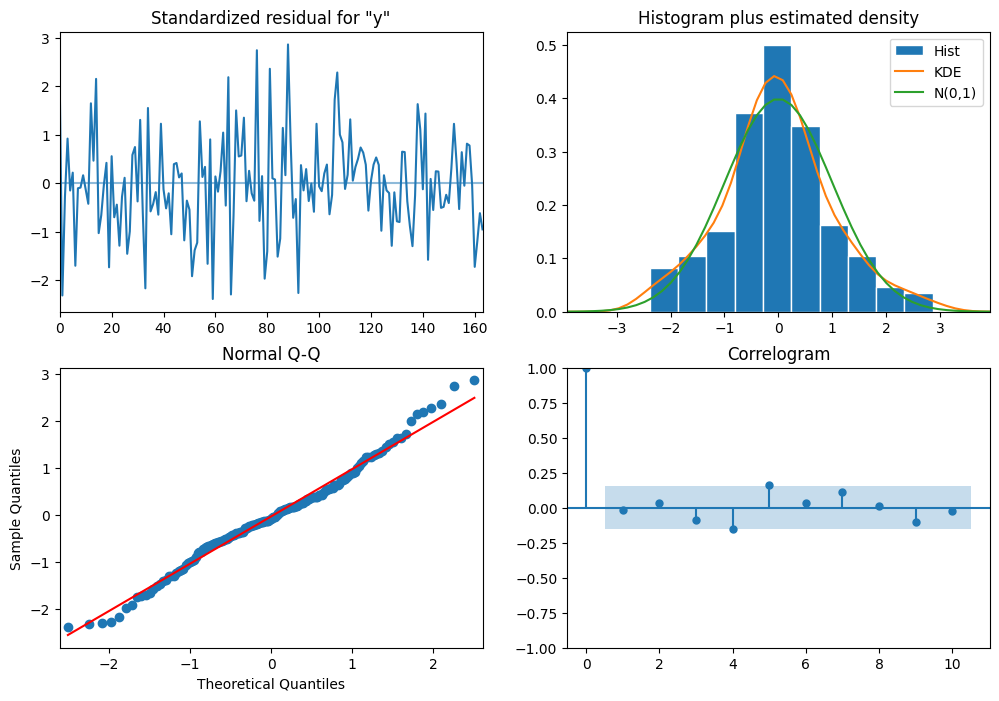

In [10]:
from models.arimax import run_arimax_model
results = run_arimax_model()
results.plot_diagnostics(figsize=(12, 8))
plt.show()

In [11]:
## 3. Model Training and Evaluation
from models.run_all_models import run_all_models
#importlib.reload(models.run_all_models)
#from models.run_all_models import run_all_models


# Run models pipeline
#run_all_models()



                Coefficient
bpi                0.000083
PNW                1.660721
brent_price       -0.032635
corn_price         0.001684
ships_anchored    -0.009610
ar.L1              0.172329
ar.L2             -0.112292
ma.L1             -0.347930
ma.L2             -0.058096
sigma2             0.514097


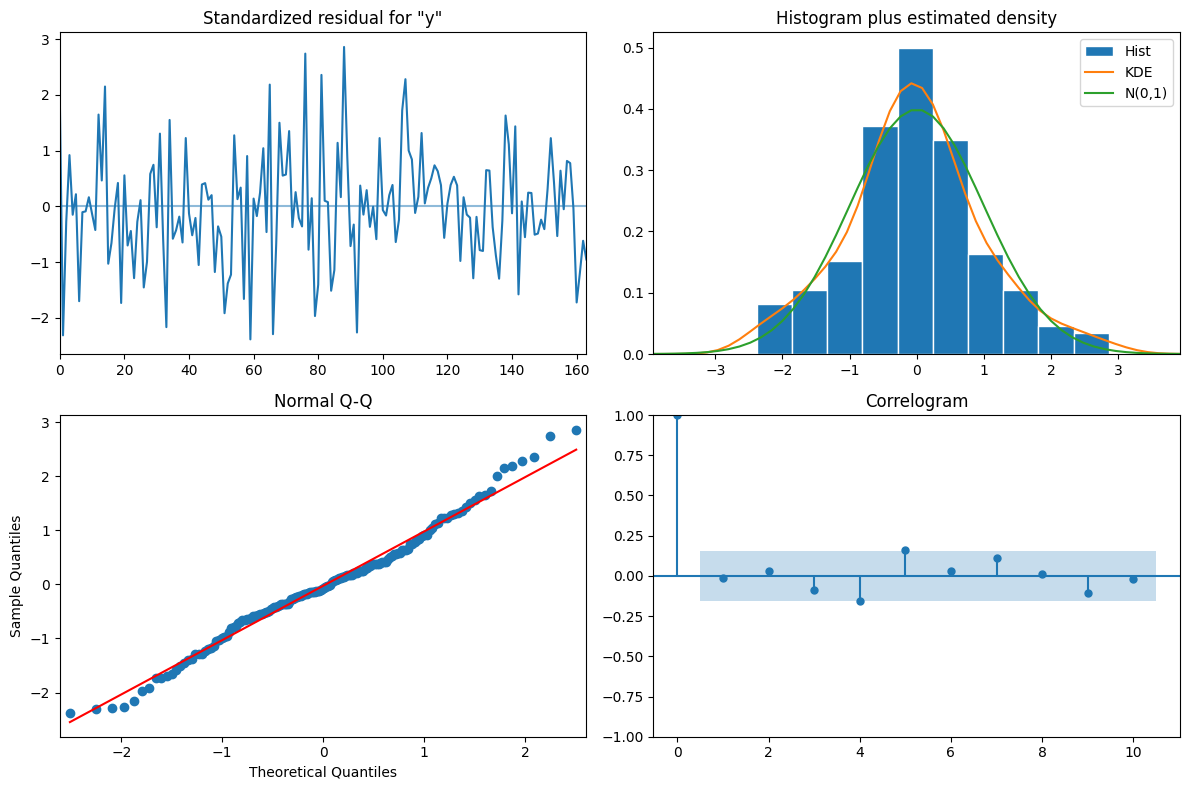

In [12]:
# Re-run after kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import statsmodels.api as sm

# Load saved ARIMAX model and data
model_path = 'reports/models_saved/Gulf_arimax_model.joblib'
model = joblib.load(model_path)

# Load original data for diagnostics
df = pd.read_csv('data/processed/processed.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[['date', 'Gulf', 'bpi', 'PNW', 'brent_price', 'corn_price', 'ships_anchored']].dropna()

# Rename to match model structure
df = df.rename(columns={'date': 'ds', 'Gulf': 'y'})

# Refit SARIMAXResults object for full diagnostics (joblib only saves model, not results)
rebuild_model = sm.tsa.SARIMAX(
    df['y'], 
    exog=df[['bpi', 'PNW', 'brent_price', 'corn_price', 'ships_anchored']], 
    order=model.order
)
results = rebuild_model.fit(disp=False)

# Plot diagnostics
fig = results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()

tables_dir = 'reports/tables'
os.makedirs(tables_dir, exist_ok=True)

coeff_df = results.params.to_frame(name="Coefficient")
print(coeff_df)
coeff_df.to_csv('reports/tables/arimax_coefficients.csv')


fig.savefig('reports/plots/ARIMAX_intrep.png')
plt.show()
